In [1]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input
import pandas as pd
from textblob import TextBlob
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model

# Exercise 1

In [2]:
corpus = 'This is good pizza, I love Italian pizza, The best pizza, nice pizza, Excellent pizza, I love pizza, The pizza was alright, disgusting pineapple pizza, not good pizza, bad pizza, very bad pizza, I had better pizza.'

data_df = pd.DataFrame()

In [3]:
TextBlob(corpus).sentiment[0]

0.15333333333333343

In [4]:
data_df['text'] = corpus.split(', ')
data_df['text'] = data_df['text'].apply(lambda x: x.translate(str.maketrans('', '', punctuation)).lower())
data_df['sentiment'] = data_df['text'].apply(lambda x: 1 if TextBlob(x).sentiment[0] > 0 else 0)
data_df

,text,sentiment
0,this is good pizza,1
1,i love italian pizza,1
2,the best pizza,1
3,nice pizza,1
4,excellent pizza,1
5,i love pizza,1
6,the pizza was alright,0
7,disgusting pineapple pizza,0
8,not good pizza,0
9,bad pizza,0


It looks like the keras Tokenizer takes care of creating a dictionary and encoding the text:

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [5]:
X = data_df['text'].values
y = data_df['sentiment'].values

tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(X) 
X = tokenizer.texts_to_sequences(X)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100 
X = pad_sequences(X, padding='post', maxlen=maxlen)

The instructions are very confusing. It says to create an embedding layer like this: Embedding (None, 5.8). And the documentation clearly says that you have to put the vocabulary size as the first input: https://keras.io/api/layers/core_layers/embedding/. Also, what's the meaning of 5.8? How can the output dimension be 5.8? I'm just guessing that it was a typo so I'm replacing it with 50.

The instructions also ask to create a flatten layer: Flatten (None, 40), and a dense layer: Dense (None, 1); but those are the wrong inputs according to the documentation.

In [6]:
#embedd_mat = zeros((vocab_size, 100))
embedding_inputs = Input(shape=(maxlen))
embedding_layer = Embedding(vocab_size, 50)(embedding_inputs)
flat_layer = Flatten()(embedding_layer)
output_layer = Dense(1)(flat_layer)
model = Model(embedding_inputs, output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [7]:
history = model.fit(X, y, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 4.4602 - accuracy: 0.3333 - val_loss: 0.7577 - val_accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 60ms/step - loss: 1.3914 - accuracy: 0.3333 - val_loss: 0.6620 - val_accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 1.0816 - accuracy: 0.3333 - val_loss: 0.6335 - val_accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 59ms/step - loss: 0.9242 - accuracy: 0.3333 - val_loss: 0.6307 - val_accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 0.8258 - accuracy: 0.3333 - val_loss: 0.6415 - val_accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 0.7584 - accuracy: 0.3333 - val_loss: 0.6608 - val_accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 59ms/step - loss: 0.7101 - accuracy: 0.3333 - val_loss: 0.6860 - val_accuracy: 0.6667
Epoch 8/100
1/1 [=====

I initially set the number of epochs to 50 following the instructions, but I noticed that after those 50 epochs, the model had not converged - it was continuing to "learn." The accuracy was .667 at epoch 50. So I doubled the number of epochs and you can see that the final accuracy is 1.  My fear with increasing the number of epochs and getting such high accuracy is that the model is most likely overfitting.

# Exercise 2

In [1]:
import nltk
import pandas as pd
import matplotlib
import numpy as np

In [80]:
tweets_df = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
tweets_df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

<AxesSubplot:xlabel='airline', ylabel='Number of Tweets'>

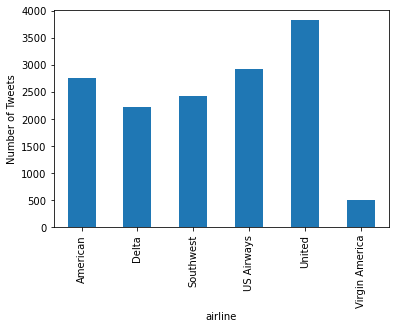

In [9]:
tweets_df.groupby('airline').count().plot.bar(y='tweet_id', ylabel='Number of Tweets', legend=False)

In [19]:
sentiment_count_df = tweets_df.groupby('airline_sentiment').count()['tweet_id'].to_frame().rename(columns={'tweet_id': 'count'})
count_total = sentiment_count['count'].sum()
sentiment_count_df['percentage'] = sentiment_count_df['count']/count_total
sentiment_count_df

,count,percentage
airline_sentiment,,
negative,9178,0.626913
neutral,3099,0.211680
positive,2363,0.161407


<AxesSubplot:ylabel='Percentage of Sentiment Type'>

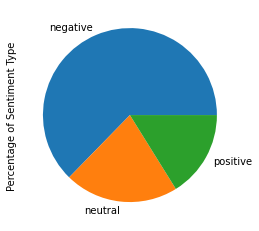

In [20]:
sentiment_count_df.plot.pie(y='percentage', ylabel='Percentage of Sentiment Type', legend=False)

In [22]:
sent_count_by_arline_df = tweets_df.groupby(['airline', 'airline_sentiment']).count()['tweet_id'].to_frame().rename(columns={'tweet_id': 'count'})
sent_count_by_arline_df

count
airline        airline_sentiment       
American       negative            1960
               neutral              463
               positive             336
Delta          negative             955
               neutral              723
               positive             544
Southwest      negative            1186
               neutral              664
               positive             570
US Airways     negative            2263
               neutral              381
               positive             269
United         negative            2633
               neutral              697
               positive             492
Virgin America negative             181
               neutral              171
               positive             152

[0 1 2 3 4 5]


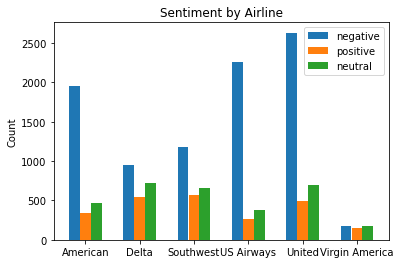

In [69]:
import matplotlib.pyplot as plt

# reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

labels = np.unique(sent_count_by_arline_df.index.get_level_values(0).values)

negative = sent_count_by_arline_df.loc[sent_count_by_arline_df.index.get_level_values(1).values == 'negative']['count'].values
positive = sent_count_by_arline_df.loc[sent_count_by_arline_df.index.get_level_values(1).values == 'positive']['count'].values
neutral = sent_count_by_arline_df.loc[sent_count_by_arline_df.index.get_level_values(1).values == 'neutral']['count'].values

x = np.arange(len(labels))
width = 0.20

fig, ax = plt.subplots()
print(x)
ax.bar(x - width/.99, negative, width, label='negative')
ax.bar(x, positive, width, label='positive')
ax.bar(x + width/2, neutral, width, label='neutral', align='edge')

ax.set_ylabel('Count')
ax.set_title('Sentiment by Airline')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

<AxesSubplot:xlabel='airline_sentiment_confidence', ylabel='Count'>

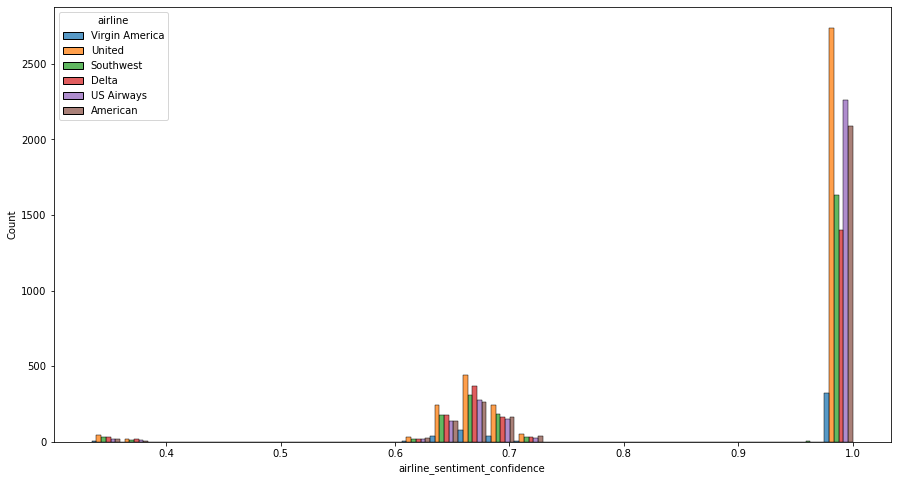

In [75]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.histplot(data=tweets_df, x="airline_sentiment_confidence", hue="airline", multiple="dodge")

In [82]:
tweets_df['airline_sentiment'] = tweets_df['airline_sentiment'].astype('category')
tweets_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [98]:
tweets_df['airline_sentiment'].cat.codes

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Length: 14640, dtype: int8

In [87]:
from sklearn.feature_extraction import text

vectorizer = text.CountVectorizer(ngram_range=(1,2), stop_words='english').fit(tweets_df['text'].values)
TfidF = text.TfidfTransformer()
X = TfidF.fit_transform(vectorizer.transform(tweets_df['text'].values))

(14640, 100073)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, tweets_df['airline_sentiment'].cat.codes.values, test_size=0.2, random_state=101)

In [90]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=101)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [91]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.7298497267759563

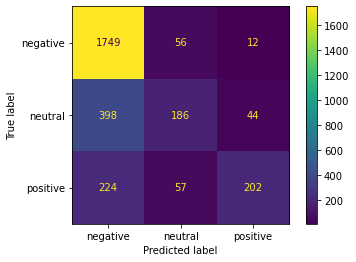

In [100]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels=['negative', 'neutral', 'positive'])  
plt.show()  

The data is imbalanced with about 63% of it being of class negative. So naturally, the random forest model is very good at predicting the negative class, but not so great at predicting the other classes. But it is specially bad at predicting the positive class (less than 50% were predicted accurately), but this is expected since this is the class with the lowest number of data points.